In [46]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("Automobile_data.csv")

In [3]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [8]:
import os
import numpy as np
import pandas as pd
from pandas.api.types import is_string_dtype
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


cwd = os.getcwd()

data = pd.read_csv("Automobile_data.csv")
data

data.replace('?',np.nan, inplace =True) 

string_col = data.select_dtypes(exclude = np.number).columns.tolist()

string_col

num_cols = ["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm","price"]

#convert into numeric data types
for i in num_cols:
    data[i]= pd.to_numeric(data[i],errors = "raise")

#catogorical conversion
for i in data:
    if is_string_dtype(data[i]):
        data[i]= data[i].astype("category").cat.as_unordered() 

#categorical code conversion
for i in data:
    if (str(data[i].dtype) == 'category'):
        data[i] = data[i].cat.codes 

#imputation
data.fillna(data.median(),inplace = True)

#modeling
X = data.drop('symboling', axis =1)
Y = data['symboling']

#Train_test_split
x_train, x_val, y_train, y_val = train_test_split(X,Y, test_size = 0.2, random_state=100)

#Decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print(dt.score(x_val,y_val))


0.7804878048780488


In [9]:
#Train_test_split
x_train, x_val, y_train, y_val = train_test_split(X,Y, test_size = 0.2, random_state=100)

#Decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print(dt.score(x_val,y_val))

0.7317073170731707


In [10]:
test_pred = dt.predict(x_val)

In [11]:
test_pred

array([ 0,  2,  1,  1,  1,  0, -2,  0,  2,  3, -1,  2,  0,  0, -1,  1,  0,
        3,  0,  3, -1, -1,  3,  1,  2,  0,  3, -1,  2,  1,  2,  0,  0, -1,
        0, -1,  0,  2,  1, -1, -1], dtype=int64)

In [12]:
accuracy_score(y_val, test_pred)

NameError: name 'accuracy_score' is not defined

In [13]:
train_pred = dt.predict(x_train)

In [14]:
train_pred

array([ 2,  0,  3,  1,  0,  1, -1,  2,  2,  1,  2,  1,  2,  1,  0, -1, -1,
        3,  2,  0,  3,  1,  3,  1,  3, -1,  3,  1, -1, -1,  1,  1,  0,  3,
        1,  0,  1,  3,  1, -1,  2,  0,  2,  3,  0,  0,  3,  1,  1,  0,  0,
        0,  3,  0,  0,  1, -1,  0,  1,  0,  1,  1,  1,  1,  0,  0,  1,  0,
        0,  1,  0,  0,  0,  1, -2,  3,  0,  1,  1,  0,  2,  1,  2,  1,  3,
        0,  1,  3, -2,  0, -1,  2,  0,  0,  0,  2,  2, -1,  2,  0,  1,  3,
        2,  2, -1,  0,  1,  2,  1,  0,  3,  0,  2,  0,  0,  0,  0,  3,  1,
        0,  0,  3,  1,  1,  3,  0,  1,  0,  2, -1,  1,  2,  0,  0,  1,  0,
        3,  0,  0,  0,  1,  1,  2,  0,  3,  0,  0,  0, -1,  1,  1,  0,  1,
        2, -1,  1,  2, -1,  1,  1,  0, -1,  1,  1], dtype=int64)

In [15]:
test_pred

array([ 0,  2,  1,  1,  1,  0, -2,  0,  2,  3, -1,  2,  0,  0, -1,  1,  0,
        3,  0,  3, -1, -1,  3,  1,  2,  0,  3, -1,  2,  1,  2,  0,  0, -1,
        0, -1,  0,  2,  1, -1, -1], dtype=int64)

In [42]:
accuracy_score(y_val, test_pred)

0.7317073170731707

In [43]:
accuracy_score(y_train, train_pred)

1.0

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
RF = RandomForestClassifier(random_state=100,oob_score=False,max_depth= None, max_features=0.8, n_estimators= 10,n_jobs=1,min_samples_split=4,min_samples_leaf=1)
RF.fit(x_train,y_train) 
RFTrain_pred = RF.predict(x_train)
RFTest_pred = RF.predict(x_val)

In [137]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [138]:
#x_train, x_val, y_train, y_val

In [139]:
#RFTrain_pred

In [140]:
#RFTest_pred

In [141]:
from sklearn.metrics import multilabel_confusion_matrix
confusion_matrix(y_train,RFTrain_pred)

array([[ 2,  0,  0,  0,  0,  0],
       [ 0, 15,  0,  1,  0,  0],
       [ 0,  0, 53,  1,  0,  0],
       [ 0,  0,  1, 46,  0,  1],
       [ 0,  0,  0,  0, 23,  0],
       [ 0,  0,  0,  0,  0, 21]], dtype=int64)

In [142]:
from sklearn.metrics import classification_report

In [143]:
#classification_report(y_train,RFTrain_pred)

In [144]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [150]:
recall_score(y_train,RFTrain_pred, average='weighted')

0.9817073170731707

In [151]:
precision_score(y_train,RFTrain_pred, average='weighted')

0.9822333589755193

In [152]:
precision_score(y_val,RFTest_pred, average='weighted')

0.792828106852497

In [153]:
recall_score(y_val,RFTest_pred, average='weighted')

0.7804878048780488

In [123]:
rfc = RandomForestClassifier()
parameters = {"n_estimators":[5,10,50,100,250], "max_depth":[2,4,8,16,32,None]}

In [124]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,parameters,cv=10)
cv.fit(x_train,y_train.values.ravel())

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [125]:
CVTrain_pred = RF.predict(x_train)
CVTest_pred = RF.predict(x_val)

In [127]:
precision_score(y_train,CVTrain_pred, average='weighted')

0.9426202142154606

In [128]:
recall_score(y_val,CVTest_pred, average='weighted')

0.7073170731707317

In [129]:
precision_score(y_val,CVTest_pred, average='weighted')

0.7066202090592335

In [68]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [92]:
display(cv)

Best parameters are: {'max_depth': None, 'n_estimators': 10}


0.568 + or -0.082 for the {'max_depth': 2, 'n_estimators': 5}
0.562 + or -0.084 for the {'max_depth': 2, 'n_estimators': 10}
0.58 + or -0.074 for the {'max_depth': 2, 'n_estimators': 50}
0.586 + or -0.097 for the {'max_depth': 2, 'n_estimators': 100}
0.58 + or -0.076 for the {'max_depth': 2, 'n_estimators': 250}
0.666 + or -0.11 for the {'max_depth': 4, 'n_estimators': 5}
0.678 + or -0.078 for the {'max_depth': 4, 'n_estimators': 10}
0.672 + or -0.091 for the {'max_depth': 4, 'n_estimators': 50}
0.691 + or -0.106 for the {'max_depth': 4, 'n_estimators': 100}
0.679 + or -0.107 for the {'max_depth': 4, 'n_estimators': 250}
0.671 + or -0.108 for the {'max_depth': 8, 'n_estimators': 5}
0.69 + or -0.103 for the {'max_depth': 8, 'n_estimators': 10}
0.708 + or -0.096 for the {'max_depth': 8, 'n_estimators': 50}
0.684 + or -0.081 for the {'max_depth': 8, 'n_estimators': 100}
0.685 + or -0.104 for the {'max_depth': 8, 'n_estimators'

In [36]:
from xgboost import XGBClassifier

In [37]:
#!pip install xgboost

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lr = LogisticRegression()

In [40]:
lr.fit(x_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [91]:
#basic way to find the best parameters
NoofEstimator = [5, 10, 15, 20]
MinSampleleaf = [1, 3, 5, 7]
MaxFeature = np.arange(0.1,1.1,0.1)
best_score = []

for i in NoofEstimator:
    for j in MinSampleleaf:
        for k in MaxFeature:
            result = [i, j, k]
            rfc=RandomForestClassifier(n_estimators=i, min_samples_leaf=j, max_features= k, random_state = 100)
            rfc.fit(x_train,y_train)
            result.append(rfc.score(x_train,y_train))
            result.append(rfc.score(x_val,y_val))
            
            if len(best_score) == 0:
                best_score = result
            elif best_score[4] < result [4]:
                best_score = result
                print(best_score)
print("the final best result is ", best_score)

[5, 1, 0.30000000000000004, 0.975609756097561, 0.8048780487804879]
[5, 1, 0.7000000000000001, 0.9817073170731707, 0.8292682926829268]
[5, 1, 0.8, 0.9939024390243902, 0.9024390243902439]
the final best result is  [5, 1, 0.8, 0.9939024390243902, 0.9024390243902439]


In [154]:
predictLGTrain = lr.predict(x_train)
predictLGTest = lr.predict(x_val)

In [156]:
# Grid search cv
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [169]:
rf = RandomForestClassifier()
rf_grid = GridSearchCV(estimator=rf,param_grid= dict(n_estimators=NoofEstimator, min_samples_leaf=MinSampleleaf, max_features= MaxFeature))

rf_grid.fit(x_train, y_train)
print(rf_grid.best_estimator_)
print(rf_grid.score(x_val,y_val))

RandomForestClassifier(max_features=0.5, n_estimators=10)
0.7560975609756098


In [168]:
print(rf_grid.best_estimator_)
print(rf_grid.score(x_val,y_val))

RandomForestClassifier(max_features=0.30000000000000004, n_estimators=15)
0.7560975609756098


In [166]:
import warnings
warnings.filterwarnings('ignore')

In [170]:
#randomised search cv

In [171]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf,param_distributions= dict(n_estimators=NoofEstimator, min_samples_leaf=MinSampleleaf, max_features= MaxFeature))

rf_random.fit(x_train, y_train)
print(rf_random.best_estimator_)
print(rf_random.score(x_val,y_val))

RandomForestClassifier(max_features=0.2, min_samples_leaf=3, n_estimators=20)
0.8048780487804879


In [172]:
#checking the oob score

In [173]:
rf_o = RandomForestClassifier(oob_score=True)
rf_o.fit(x_train, y_train)
rf_o.oob_score_

0.7987804878048781

In [187]:
import matplotlib as plt

In [175]:
#feature importance

In [185]:
imp_features = rf_random.best_estimator_.feature_importances_
imp_features

array([0.0799136 , 0.04153308, 0.        , 0.00043733, 0.06866951,
       0.03714237, 0.00127853, 0.        , 0.13770001, 0.05998772,
       0.07996408, 0.07628909, 0.04897461, 0.0073235 , 0.00614936,
       0.02477925, 0.01164023, 0.0612618 , 0.03363773, 0.03098846,
       0.03203031, 0.02862936, 0.0265874 , 0.04379539, 0.06128729])

In [178]:
list(X.columns)

['normalized-losses',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-type',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [179]:
feature_lst = list(X.columns)

In [191]:
feature_importance = sorted(zip(imp_features, feature_lst), reverse =True)

In [183]:
df = pd.DataFrame(feature_importanance, columns = ['importance', 'feature'])

In [184]:
df

,importance,feature
0,0.137700,wheel-base
1,0.079964,width
2,0.079914,normalized-losses
3,0.076289,height
4,0.068670,num-of-doors
5,0.061287,price
6,0.061262,bore
7,0.059988,length
8,0.048975,curb-weight
9,0.043795,highway-mpg


Text(0.5, 1.0, 'Variable Importances')

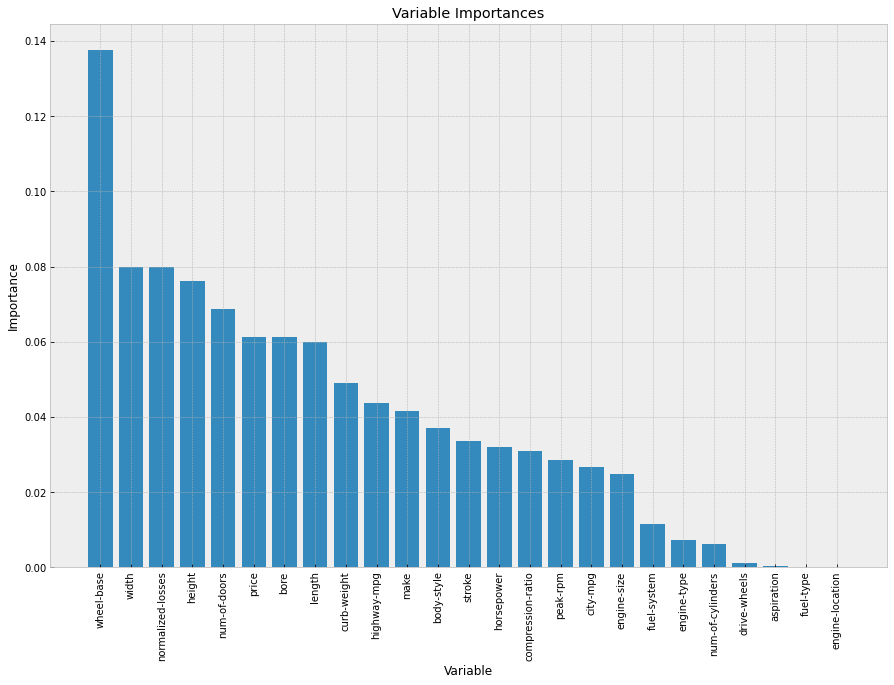

In [192]:
# Set the style
plt.style.use('bmh') #"ggplot higly used in R for stats visuals" 


# list of x locations for plotting
x_values = list(range(len(feature_importance)))
importance= list(df['importance'])
feature= list(df['feature'])


# Make a bar chart
plt.figure(figsize=(15,10))
plt.bar(x_values, importance, orientation = 'vertical')


# Tick labels for x axis
plt.xticks(x_values, feature, rotation='vertical')


# Axis labels and title
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')


In [189]:
from matplotlib import pyplot as plt

In [193]:
from sklearn.ensemble import AdaBoostClassifier

In [194]:
#ada boost algorithm

In [195]:
rf = RandomForestClassifier(random_state = 100, max_features= 0.4, min_samples_leaf=1, n_estimators=20)


In [197]:
ab_model = AdaBoostClassifier(base_estimator=rf, n_estimators=50)

In [198]:
ab_model.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_features=0.4,
                                                         n_estimators=20,
                                                         random_state=100))

In [200]:
print(ab_model.score(x_val,y_val))

0.8536585365853658


In [201]:
#XG boost

In [202]:
from xgboost import XGBClassifier

In [203]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
print(xgb.score(x_val,y_val))

[11:31:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8292682926829268
